<a href="https://colab.research.google.com/github/JJOK97/core-project-study/blob/eh%2Ftext_mining/kiwipiepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 목표 설정
- kiwipiepy 형태소 분석기를 사용해보고 Konlpy와는 어떤점이 다른지 확인

### Kiwi 라이브러리
- 빠른 속도와 범용적인 성능을 지향하는 형태소 분석기
- C++로 구현된 코어를 래핑해서 다양한 프로그래밍 언어에서 사용하도록 만들었다. / 오픈소스 공개
- 세종 품사 태그셋을 사용한다.
- 웹 텍스트 약 87% / 문어체 텍스트는 94% 정확도로 형태소 분석이 가능하다. (공식 GitHub 참조)
- Konlpy보다 속도가 더 빠르다.
- 간단한 오타나 띄어쓰기는 스스로 교정할 수 있는 기능을 제공

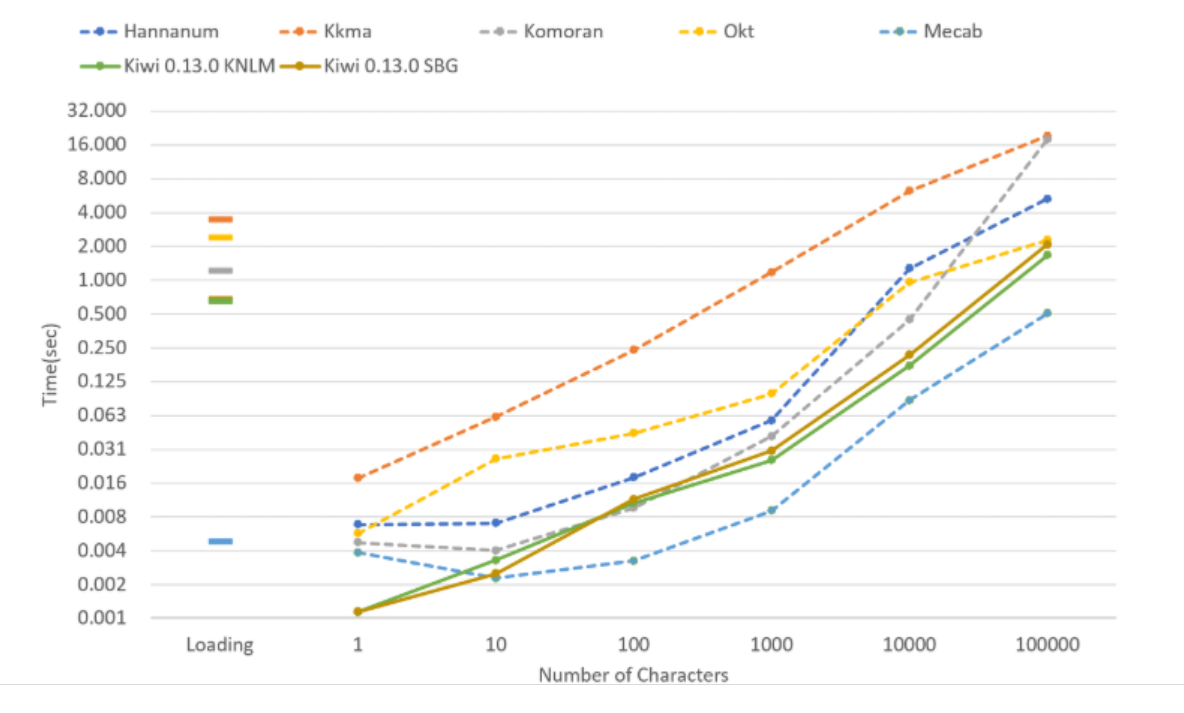

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요한 라이브러리 호출
import pandas as pd

In [ ]:
# 경로 확인
!pwd

/content


In [ ]:
# 소스코드가 있는 경로로 위치를 변경
%cd /content/drive/MyDrive/Colab Notebooks/SW엔지니어

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


In [ ]:
# train데이터 / test 데이터 불러오기
train = pd.read_csv('./data/ratings_train.csv', encoding = 'utf-8')
test = pd.read_csv('./data/ratings_test.csv', encoding = 'utf-8')

In [ ]:
# 데이터 정보 확인(train, test 모두 진행)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
# 결측치 삭제처리
# dropna()
train = train.dropna()
test = test.dropna()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 데이터 분할 - 어떤 컬럼을 문제로 사용, 어떤 컬럼을 정답으로 사용
X_train = train['document']
X_test = test['document']
y_train = train['label']
y_test = test['label']

In [ ]:
# 데이터 shape 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149995,), (49997,), (149995,), (49997,))

Kiwipiepy 라이브러리 설치
- Kiwipiepy 라이브러리는 의존성이 없다. 편리하게 환경 구축이 가능하다.

In [ ]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 82.4 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.20.0-py3-none-any.whl size=34818026 sha256=ea02e61c322d24f671b7ec63e4fbe406ddab373b09b7a4bfa8b2b5f06292bd33
  Stored in directory: /root/.cache/pip/wheels/ca/c8/52/3a539d6e9065b191fe1c215e0203dcc3e00601c0e3d3d39824
Successfully built kiwipiepy_model


In [ ]:
# 라이브러리 import
# 사이킷런 Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 키위파이 형태소 분석기 import
from kiwipiepy import Kiwi, basic_typos_with_continual

In [ ]:
# 객체 생성
kiwi = Kiwi(typos=basic_typos_with_continual)

- Kiwipiepy는 간단한 오타 교정도구를 제공
  - basic_typos : 형태소 내에 오타를 교정하는 기본적인 오타 교정 도구
  - continual_typos : 형태소간의 연철 오타를 교정하는 교정 도구
  - basic_typos_with_continual : 위의 두가지 오타 교정도구를 하나로 합친 기능

In [ ]:
# 형태소 분석 - tokenize
token = kiwi.tokenize('아버지가 방에 들어가신다')
token

#

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=3, len=1),
 Token(form='방', tag='NNG', start=5, len=1),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2)]